In [351]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore,boxcox

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler,StandardScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#CrossVal
from sklearn.model_selection import cross_val_score

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

#Deeplearning
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping

In [352]:
df=pd.read_csv('Absenteeism_at_work.csv',sep=';')

In [353]:
df.head()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
0,11,26,7,3,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,4
1,36,0,7,3,1,118,13,18,50,239.554,...,1,1,1,1,0,0,98,178,31,0
2,3,23,7,4,1,179,51,18,38,239.554,...,0,1,0,1,0,0,89,170,31,2
3,7,7,7,5,1,279,5,14,39,239.554,...,0,1,2,1,1,0,68,168,24,4
4,11,23,7,5,1,289,36,13,33,239.554,...,0,1,2,1,0,1,90,172,30,2


In [354]:
df.describe()

,ID,Reason for absence,Month of absence,Day of the week,Seasons,Transportation expense,Distance from Residence to Work,Service time,Age,Work load Average/day,...,Disciplinary failure,Education,Son,Social drinker,Social smoker,Pet,Weight,Height,Body mass index,Absenteeism time in hours
count,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,...,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000,740.000000
mean,18.017568,19.216216,6.324324,3.914865,2.544595,221.329730,29.631081,12.554054,36.450000,271.490235,...,0.054054,1.291892,1.018919,0.567568,0.072973,0.745946,79.035135,172.114865,26.677027,6.924324
std,11.021247,8.433406,3.436287,1.421675,1.111831,66.952223,14.836788,4.384873,6.478772,39.058116,...,0.226277,0.673238,1.098489,0.495749,0.260268,1.318258,12.883211,6.034995,4.285452,13.330998
min,1.000000,0.000000,0.000000,2.000000,1.000000,118.000000,5.000000,1.000000,27.000000,205.917000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,56.000000,163.000000,19.000000,0.000000
25%,9.000000,13.000000,3.000000,3.000000,2.000000,179.000000,16.000000,9.000000,31.000000,244.387000,...,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,69.000000,169.000000,24.000000,2.000000
50%,18.000000,23.000000,6.000000,4.000000,3.000000,225.000000,26.000000,13.000000,37.000000,264.249000,...,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,83.000000,170.000000,25.000000,3.000000
75%,28.000000,26.000000,9.000000,5.000000,4.000000,260.000000,50.000000,16.000000,40.000000,294.217000,...,0.000000,1.000000,2.000000,1.000000,0.000000,1.000000,89.000000,172.000000,31.000000,8.000000
max,36.000000,28.000000,12.000000,6.000000,4.000000,388.000000,52.000000,29.000000,58.000000,378.884000,...,1.000000,4.000000,4.000000,1.000000,1.000000,8.000000,108.000000,196.000000,38.000000,120.000000


In [355]:
df.isna().sum()

ID                                 0
Reason for absence                 0
Month of absence                   0
Day of the week                    0
Seasons                            0
Transportation expense             0
Distance from Residence to Work    0
Service time                       0
Age                                0
Work load Average/day              0
Hit target                         0
Disciplinary failure               0
Education                          0
Son                                0
Social drinker                     0
Social smoker                      0
Pet                                0
Weight                             0
Height                             0
Body mass index                    0
Absenteeism time in hours          0
dtype: int64

In [356]:
df=df.drop('ID',axis=1)

In [357]:
df['Reason for absence'].unique()

array([26,  0, 23,  7, 22, 19,  1, 11, 14, 21, 10, 13, 28, 18, 25, 24,  6,
       27, 17,  8, 12,  5,  9, 15,  4,  3,  2, 16])

In [358]:
df['Reason for absence'].value_counts()

23    149
28    112
27     69
13     55
0      43
19     40
22     38
26     33
25     31
11     26
10     25
18     21
14     19
1      16
7      15
6       8
12      8
8       6
21      6
9       4
5       3
24      3
16      3
4       2
15      2
3       1
2       1
17      1
Name: Reason for absence, dtype: int64

In [359]:
df['Reason for absence'].skew()

-0.915312365936857

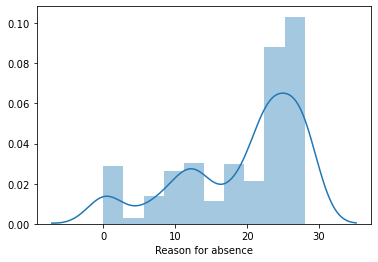

In [360]:
sns.distplot(df['Reason for absence'])

In [361]:
pt=PowerTransformer()

In [362]:
df['Reason for absence']=pt.fit_transform(df['Reason for absence'].values.reshape(-1,1))

In [363]:
df['Reason for absence'].skew()

-0.6364319042404564

In [364]:
df['Reason for absence'].value_counts()

 0.415089    149
 1.138706    112
 0.990064     69
-0.864613     55
-2.012378     43
-0.126037     40
 0.276491     38
 0.843335     33
 0.698564     31
-1.088201     26
-1.195150     25
-0.255566     21
-0.748282     19
-1.961505     16
-1.494252     15
-1.585834      8
-0.977968      8
 0.140062      6
-1.398413      6
-1.298627      4
 0.555798      3
-1.672780      3
-0.507188      3
-0.629102      2
-1.754607      2
-1.830679      1
-1.900103      1
-0.382645      1
Name: Reason for absence, dtype: int64

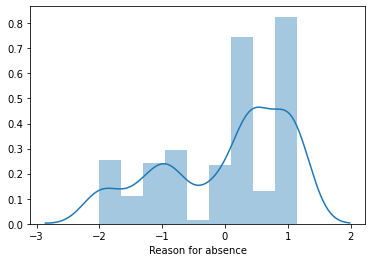

In [365]:
sns.distplot(df['Reason for absence'])

In [366]:
df_new=pd.concat([pd.get_dummies(df['Reason for absence'],prefix='RFA'),df.drop('Reason for absence',axis=1)],axis=1)

In [367]:
df_new.skew()

RFA_-2.0123782058129054             3.785374
RFA_-1.9615046838540706             6.591522
RFA_-1.9001029771821532            27.202941
RFA_-1.830679406807174             27.202941
RFA_-1.754607446528865             19.196248
RFA_-1.6727800718052486            15.641680
RFA_-1.5858342250450401             9.480249
RFA_-1.4942518811436991             6.822215
RFA_-1.3984130962485901            10.992322
RFA_-1.2986268311036557            13.518357
RFA_-1.1951502165273595             5.171396
RFA_-1.0882012785559159             5.059812
RFA_-0.9779677160664726             9.480249
RFA_-0.8646131711768877             3.252338
RFA_-0.7482818398708067             6.009999
RFA_-0.6291019454514114            19.196248
RFA_-0.5071884099647446            15.641680
RFA_-0.3826449457593909            27.202941
RFA_-0.25556571871001593            5.691976
RFA_-0.12603668903943216            3.952270
RFA_0.14006159251404288            10.992322
RFA_0.2764910224576354              4.073704
RFA_0.4150

In [368]:
df_new['RFA_-2.0123782058129054'].skew()

3.7853744697594194

In [369]:
df_new['RFA_-2.0123782058129054']=np.log1p(df_new['RFA_-2.0123782058129054'])

In [370]:
df_new['RFA_-2.0123782058129054'].skew()

3.785

In [371]:
#Since data is much skewed we will just drop it
df_new=df_new.drop('RFA_-2.0123782058129054',axis=1)

In [372]:
df_new['RFA_-1.9615046838540706'].skew()

6.591521917682377

In [373]:
df_new['RFA_-1.9615046838540706']=np.log1p(df_new['RFA_-1.9615046838540706'].values.reshape(-1,1))

In [374]:
df_new['RFA_-1.9615046838540706'].skew()

6.594

In [375]:
for x in df_new.columns:
    if abs(df_new.loc[:,x].skew())>0.55:
        df_new.loc[:,x]=np.log1p(df_new.loc[:,x])

In [376]:
df_new.corr()['Absenteeism time in hours'].sort_values(ascending=False)

Absenteeism time in hours          1.000000
RFA_-0.12603668903943216           0.251501
RFA_-0.8646131711768877            0.213248
RFA_-1.2986268311036557            0.147806
RFA_0.2764910224576354             0.147645
RFA_-1.1951502165273595            0.147328
Son                                0.127534
RFA_0.8433346133810518             0.121919
Transportation expense             0.114703
RFA_-1.9615046838540706            0.112777
Height                             0.112390
RFA_-0.25556571871001593           0.101742
RFA_-1.5858342250450401            0.101114
RFA_-0.9779677160664726            0.096681
Social drinker                     0.092870
RFA_-1.4942518811436991            0.076740
RFA_-1.9001029771821532            0.069704
RFA_-0.7482818398708067            0.069540
RFA_-1.0882012785559159            0.064841
Hit target                         0.053384
RFA_0.5557981422972563             0.045141
RFA_-0.6291019454514114            0.036832
Work load Average/day           

In [377]:
# for x in df_new.columns.drop('Absenteeism time in hours'):
#     if abs(df_new.loc[:,x].skew())>0.55:
#         df_new=df_new.drop(x,axis=1)

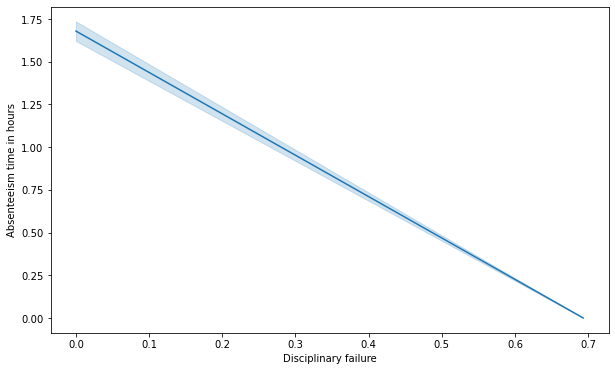

In [378]:
plt.figure(figsize=(10,6))
sns.lineplot(x='Disciplinary failure',y='Absenteeism time in hours',data=df_new)
plt.show()

In [379]:
df_new=pd.concat([pd.get_dummies(df['Month of absence'],prefix='MOA'),df_new.drop('Month of absence',axis=1)],axis=1)

In [380]:
df_new=pd.concat([pd.get_dummies(df['Day of the week'],prefix='DOW'),df_new.drop('Day of the week',axis=1)],axis=1)

In [381]:
df_new=pd.concat([pd.get_dummies(df['Seasons'],prefix='S'),df_new.drop('Seasons',axis=1)],axis=1)

In [382]:
df_new=pd.concat([pd.get_dummies(df['Education'],prefix='E'),df_new.drop('Education',axis=1)],axis=1)

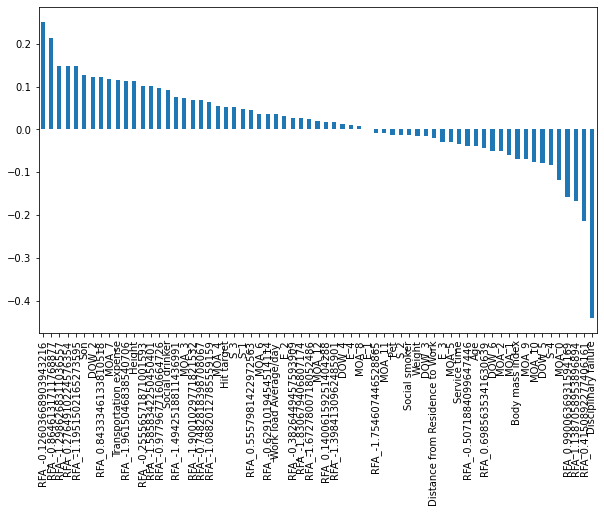

In [383]:
plt.figure(figsize=(10,6))
df_new.corr()['Absenteeism time in hours'].sort_values(ascending=False).drop('Absenteeism time in hours').plot(kind='bar')
plt.show()

In [384]:
X_new=df_new.drop('Absenteeism time in hours',axis=1)
y_new=df_new['Absenteeism time in hours']

In [385]:
scale=MinMaxScaler()

In [386]:
X_new=scale.fit_transform(X_new)

In [387]:
def model(mod):
    maxscore=0
    maxsstate=0
    for x in range(42,105):
        X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=x)
        md=mod()
        md.fit(X_train,y_train)
        predict=md.predict(X_test)
        r2score=r2_score(y_test,predict)
        if r2score>maxscore:
            maxscore=r2score
            maxsstate=x
    print("Max score is {} and maxstate is {}".format(maxscore,maxsstate))

In [388]:
model(LinearRegression)

Max score is 0.512239704987322 and maxstate is 82


In [389]:
model(RandomForestRegressor)

Max score is 0.5797820026135039 and maxstate is 82


In [390]:
model(Ridge)

Max score is 0.5769559371423933 and maxstate is 89


In [391]:
model(ElasticNet)

Max score is 0 and maxstate is 0


In [392]:
model(Lasso)

Max score is 0 and maxstate is 0


In [393]:
model(KNeighborsRegressor)

Max score is 0.33685230158608004 and maxstate is 104


In [394]:
model(AdaBoostRegressor)

Max score is 0.3616925938596941 and maxstate is 56


In [395]:
df.shape

(740, 20)

In [396]:
zs=zscore(df_new)
df_new=df_new[((zs<3)&(zs>-3)).all(axis=1)]

In [397]:
df.shape

(740, 20)

In [398]:
df_new.skew()

E_1                         -4.123106
E_2                          0.000000
E_3                          4.123106
E_4                          0.000000
S_1                          0.000000
                               ...   
Pet                          0.622351
Weight                       0.322491
Height                       1.252446
Body mass index              0.153172
Absenteeism time in hours    1.398803
Length: 68, dtype: float64

In [400]:
for x in df_new.columns.drop('Absenteeism time in hours'):
    if abs(df_new.loc[:,x].skew())>1:
        df_new=df_new.drop(x,axis=1)

In [427]:
df.corr()['Absenteeism time in hours']

Reason for absence                -0.201400
Month of absence                   0.024345
Day of the week                   -0.124361
Seasons                           -0.005615
Transportation expense             0.027585
Distance from Residence to Work   -0.088363
Service time                       0.019029
Age                                0.065760
Work load Average/day              0.024749
Hit target                         0.026695
Disciplinary failure              -0.124248
Education                         -0.046235
Son                                0.113756
Social drinker                     0.065067
Social smoker                     -0.008936
Pet                               -0.028277
Weight                             0.015789
Height                             0.144420
Body mass index                   -0.049719
Absenteeism time in hours          1.000000
Name: Absenteeism time in hours, dtype: float64

In [401]:
X_new=df_new.drop('Absenteeism time in hours',axis=1)
y_new=df_new['Absenteeism time in hours']

In [402]:
X_new=scale.fit_transform(X_new)

In [403]:
model(LinearRegression)

Max score is 0.4975276556120033 and maxstate is 68


In [411]:
model(RandomForestRegressor)

Max score is 0.8233155070045061 and maxstate is 72


In [405]:
model(Ridge)

Max score is 0.5492449786461411 and maxstate is 102


In [406]:
model(ElasticNet)

Max score is 0 and maxstate is 0


In [407]:
model(Lasso)

Max score is 0 and maxstate is 0


In [408]:
model(KNeighborsRegressor)

Max score is 0.45846540383743783 and maxstate is 77


In [410]:
model(AdaBoostRegressor)

Max score is 0.67239642499764 and maxstate is 72


In [412]:
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.33, random_state=72)

In [419]:
rf=RandomForestRegressor()
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [420]:
print("R2 score is {}".format(r2_score(y_test,predict)))
print()
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print()
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

R2 score is 0.7917428232194141

MAE score is 0.17773483488466968

RMSE score is 0.21970573811701233


In [421]:
param={'n_estimators':[100,130,150,170,200,230,250,270,300,330,350,370,400,430,450,470,500]}
gscv=GridSearchCV(RandomForestRegressor(),param)

In [422]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'n_estimators': [100, 130, 150, 170, 200, 230, 250,
                                          270, 300, 330, 350, 370, 400, 430,
                                          450, 470, 500]})

In [423]:
gscv.best_params_

{'n_estimators': 150}

In [424]:
rf=RandomForestRegressor(n_estimators=150)
rf.fit(X_train,y_train)
predict=rf.predict(X_test)

In [425]:
print("R2 score is {}".format(r2_score(y_test,predict)))
print()
print("MAE score is {}".format(mean_absolute_error(y_test,predict)))
print()
print("RMSE score is {}".format(np.sqrt(mean_squared_error(y_test,predict))))

R2 score is 0.8341686378927485

MAE score is 0.16611265586728904

RMSE score is 0.1960535656759004


In [426]:
joblib.dump(rf,'Absenteeism RF.obj')

['Absenteeism RF.obj']